<a href="https://colab.research.google.com/github/hyehyuni/essa/blob/main/hw_0508.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[과제 _ 개념정리]**

**범위 : 파이썬 머신러닝 완벽가이드 ch4. 6 ~ 7, 10 pg. 227 ~ 251, 278 ~ 289**


---


## **6. XGBoost**

### **1) XGBoost 개요**

트리 기반의 앙상블 학습에서 가장 각광받고 있는 알고리즘

<XGBoost의 장점>


* 뛰어난 예측 성능 : 일반적으로 분류와 회귀 영역에서 뛰어난 예측 성능을 발휘
* GBM 대비 빠른 수행 시간: 일반적인 GBM은 전반적으로 속도가 느리지만 XGBoost는 병렬 수행 및 다양한 기능으로 GBM에 비해 빠른 수행 성능을 보장 (이는 XGBoost가 일반적인 GBM에 비해 수행 시간이 빠르다는 것이지, 다른 머신러닝 알고리즘에 비해서 빠르다는 의미는 아니다.)
* 과적합 규제:  XGBoost는 자체에 과적합 규제 기능으로 과적합에 좀 더 강한 내구성을 가질 수 있음
* Tree pruning: : max_depth 파라미터로 분할 깊이를 조정하기도 하지만, tree pruning으로 더 이상 긍정 이득이 없는 분할을 가지치기해서 분할 수를 더 줄이는 추가적인 장점
* 자체 내장된 교차 검증:  반복 수행 시마다 내부적으로 학습 데이터 세트와 평가 데이터 세트에 대한 교차 검증 수행(평가 값 최적화되면 조기 중단)
* 결손값 자체 처리: XGBoost는 결손값을 자체 처리할 수 있는 기능 가지고 있음

XGBoost의 파이썬 패키지는  **xgboost**

-> 파이썬 래퍼 XGBoost 모듈 + 사이킷런 래퍼 XGBoost 모듈(XGBClassifier와 XGBRegressor)

-> 사이킷런 래퍼 XGBoost 모듈은 사이킷런의 다른 Estimator와 사용법 같지만, 파이썬 네이티브 XGBoost는 고유의 API와 하이퍼 파라미터 이용

In [1]:
import xgboost as xgb
from xgboost import XGBClassifier

### **2) 파이썬 래퍼 XGBoost 하이퍼 파라미터**

XGBoost는 GBM과 유사한 하이퍼 파라미터이지만, 사이킷런 파라미터의 범용화된 이름 규칙에 따라 파라미터명 달라진다.

-> 파이썬, 사이킷런 래퍼 XGBoost 모듈 일부 하이퍼 파라미터 주의 필요

(1) 일반 파라미터

일반적으로 실행 시 스레드의 개수나 silent 모드 등의 선택을 위한 파라미터. 디폴트 파라미터 값을 바꾸는 경우는 거의 없음

* booster : gbtree(tree based model) 또는 gblinear(linear model) 선택. 디폴트는 gbtree
* silent : 디폴트는 0이며, 출력 메세지를 나타내고 싶지 않을 경우 1로 설정

(2) 부스터 파라미터

트리 최적화, 부스팅, regularization 등과 관련 파라미터 등을 지칭. 대부분의 하이퍼 파라미터

* eta[default=0.3, alias:learning_rate]: GBM의 학습률(learning rate)과 같은 파라미터, 0에서 1 사이의 값을 지정하며 부스팅 스텝을 반복적으로 수행할 때 업데이트되는 학습률 값  

  -> 파이썬 래퍼 기반의 xgboost를 이용할 경우 디폴트는 0.3, 사이킷런 래퍼 클래스를 이용할 경우 eta는 learning_rate 파라미터로 대체되며 디폴트는 0.1, 보통은 0.01~0.2 사이의 값을 선호

* num_boost_rounds: GBM의 n_estimators와 같은 파라미터
* min_child_weight[default=1]: 트리에서 추가적으로 가지를 나눌지를 결정하기 위해 필요한 데이터들의 weight 총합, 
  
  -> min_child_weight이 클수록 분할을 자제함, 과적합을 조절하기 위해 사용됨
* gamma[default=0, alias:min_split_loss]: 트리의 리프 노드를 추가적으로 나눌지를 결정할 최소 손실 감소 값, 해당 값보다 큰 손실(loss)이 감소된 경우에 리프 노드를 분리함, 값이 클수록 과적합 감소 효과가 있음

* max_depth[default=6]: 트리 기반 알고리즘의 max_depth와 같음, 0을 지정하면 깊이에 제한이 없음

  -> Max_depth가 높으면 특정 피처 조건에 특화되어 룰 조건이 만들어지므로 과적합 가능성이 높아지며 보통은 3~10 사이의 값 적용
* sub_sample[default=1]: GBM의 subsample과 동일, 트리가 커져서 과적합되는 것을 제어하기 위해 데이터를 샘플링하는 비율 지정

  ->  sub_sample=0.5로 지정하면 전체 데이터의 절반을 트리를 생성하는 데 사용, 0에서 1 사이의 값이 가능하나 일반적으로 0.5~1 사이의 값 사용
* colsample_bytree[default=1]: GBM의 max_features와 유사, 트리 생성에 필요한 피처(칼럼)를 임의로 샘플링하는 데 사용됨
 
 -> 매우 많은 피처가 있는 경우 과적합을 조정하는 데 적용
* lambda[default=1, alias:reg_lambda]: L2 Regularization 적용 값,

  -> 피처 개수가 많을 경우 적용을 검토하며 값이 클수록 과적합 감소 효과가 있음
* alpha[default=0, alias:reg_alpha]: L1 Regularization 적용 값

  -> 피처 개수가 많을 경우 적용을 검토하며 값이 클수록 과적합 감소 효과가 있음
* scale_pos_weight[default=1]: 특정 값으로 치우친 비대칭한 클래스로 구성된 데이터 세트의 균형을 유지하기 위한 파라미터


(3) 학습 태스크 파라미터 

학습 수행 시의 객체 함수, 평가를 위한 지표 등을 설정하는 파라미터


* objective: 최솟값을 가져야 할 손실 함수를 정의, XGBoost는 많은 유형의 손실함수를 사용할 수 있음,주로 사용되는 손실함수는 이진 분류인지 다중 분류인지에 따라 달라짐
* binary:logistic: 이진 분류일 때 적용
* multi:softmax: 다중 분류일 때 적용, 손실함수가 
  -> multi:softmax일 경우에는 레이블 클래스의 개수인 num_class 파라미터를 지정해야 함

* eval_metric: 검증에 사용되는 함수를 정의, 기본값은 회귀인 경우는 rmse, 분류일 경우에는 error
 
  ->  rmse, mae, logloss, error, merror, mlogloss, auc

<과적합의 문제가 심하다면?>
* eta 값 낮춘다.(0.01~0.1). eta 값을 낮출 경우 num_round(또는 n_estimators)는 반대로 높여야한다.
* max_depth 값 낮춘다.
* min_child_weight 값 높인다.
* gamma 값 높인다.
* subsample과 colsample_bytree 조정


<XGboost 기능>

* 자체적으로 교차 검증, 성능 평가, 피처 중요도 등의 시각화 기능
* 조기 중단 기능(n_estimators에 지정한 부스팅 반복 횟수에 도달하지 않더라도 예측 오류가 더 이상 개선되지 않으면 반복을 끝까지 수행하지 않고 중지해 수행 시간 개선)

In [2]:
import xgboost

print(xgboost.__version__)

1.7.5


### **3) 파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측**

종양의 크기, 모양 등의 다양한 속성값을 기반으로 악성 종양인지 양성 종양인지를 분류한 데이터 세트

종양은 양성 종양과 악성 종양으로 구분된다. 

=> 위스콘신 유방암 데이터 세트에 기반해 종양의 다양한 피처에 따라 악성종양인지 일반 양성종양인지를 XGBoost를 이용해 예측

* plot_importance

  xgboost 패키지의 피처의 중요도 시각화해주는 모듈
* load_breast_cancer()

  사이킷런의 위스콘신 유방암 데이터 세트

In [3]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target'] = y_label
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


->  종양의 크기와 모양에 관련된 많은 속성이 숫자형 값임

->  타킷 레이블 값의 종류는 악성인 'malignant'가 0 값으로, 양성인 'benign'이 1값으로

(1) 레이블 값의 분포

In [4]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


->  1값인 양성 benign이 357개, 0값인 악성 malignant가 212개로 구성.

(2) 데이터세트 분할

전체 데이터 세트 중 80%를 학습용으로, 20%를 테스트용으로 분할.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


(3) DMatrix

넘파이 형태의 학습 데이터 세트와 테스트 데이터 세트를 DMatrix로 변환

* 파이썬 래퍼 XGBoost와 사이킷런과의 가장 큰 차이는 학습용과 테스트용 데이터 세트를 위해 별도의 객체인 DMatrix를 생성한다는 것

* DMatrix 

  -> 주로 넘파이 입력 파라미터를 받아서 만들어지는 XGBoost만의 전용 데이터 세트

  -> 주요 입력 파라미터 : data(피처 데이터 세트)
   
  -> 넘파이 외에 libsvm txt 포맷 파일, xgboost 이진 버퍼 파일을 파라미터로 입력받아 변환 가능

In [6]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

(4) 하이퍼 파라미터 설정 

In [7]:
params = { 'max_depth' :3,
          'eta' :0.1,                              # XGBClassifier 사용할 경우 eta가 아니라 learning_rate
          'objective' :'binary:logistic',          # 0 또는 1 이진분류이므로 목적함수는 이진 로지스틱
          'eval_metric' :'logloss',
          'early_stoppings' :100
}
num_rounds = 400

(5) 모델 학습

지정된 하이퍼 파라미터로 XGBoost 모델 학습

파이썬 래퍼 XGBoost는 하이퍼 파라미터를 xgboost 모듈의 train() 함수에 파라미터로 전달

* early_stopping_rounds

  -> 조기 중단은 xgboost의 train() 함수에 early_stopping_rounds 파라미터 입력

  -> 반드시 eval_set과 eval_metric를 함께 설정해야한다.

  -> eval_set 는 성능 평가를 수행할 평가용 데이터 세트 설정

  -> eval_metric 은 평가 세트에 적용할 성능 평가 방법이며 분류일 경우는 주로 'error', 'logloss' 적용
  
  -> evals 파라미터에 학습 데이터 세트와 eval 데이터 세트 명기해야해

In [8]:
# train 데이터 세트는 'train', evaluation(test) 데이터 세트는 'eval'로 명기합니다.
wlist = [(dtrain, 'train'), (dtest, 'eval')]
# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, \
                      early_stopping_rounds=100, evals=wlist)

[05:35:00] WARNING: ../src/learner.cc:767: 
Parameters: { "early_stoppings" } are not used.

[0]	train-logloss:0.60969	eval-logloss:0.61352
[1]	train-logloss:0.54080	eval-logloss:0.54784
[2]	train-logloss:0.48375	eval-logloss:0.49425
[3]	train-logloss:0.43446	eval-logloss:0.44799
[4]	train-logloss:0.39055	eval-logloss:0.40911
[5]	train-logloss:0.35415	eval-logloss:0.37498
[6]	train-logloss:0.32122	eval-logloss:0.34571
[7]	train-logloss:0.29259	eval-logloss:0.32053
[8]	train-logloss:0.26747	eval-logloss:0.29721
[9]	train-logloss:0.24515	eval-logloss:0.27799
[10]	train-logloss:0.22569	eval-logloss:0.26030
[11]	train-logloss:0.20794	eval-logloss:0.24604
[12]	train-logloss:0.19218	eval-logloss:0.23156
[13]	train-logloss:0.17792	eval-logloss:0.22005
[14]	train-logloss:0.16522	eval-logloss:0.20857
[15]	train-logloss:0.15362	eval-logloss:0.19999
[16]	train-logloss:0.14333	eval-logloss:0.19012
[17]	train-logloss:0.13398	eval-logloss:0.18182
[18]	train-logloss:0.12560	eval-logloss:0.17473
[19]	

->  train-error와 eval_logloss가 지속적으로 감소

(6) 테스트 데이터 세트에 예측 수행

 xgboost의 predict()는 예측 결괏값이 아닌 예측 결과를 추정할 수 있는 확률 값을 반환함을 주의!

 -> 본 예제는 이진 분류이므로 0.5 기준으로 0,1 결정하는 로직 추가

In [9]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결괏값을 10개만 표시, 예측 확률값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 에측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [1 if x>0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:', preds[:10])

predict() 수행 결괏값을 10개만 표시, 예측 확률값으로 표시됨
[0.934 0.003 0.91  0.094 0.993 1.    1.    0.999 0.997 0.   ]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


(7) get_clf_eval() 함수 적용해 XGBoost 모델의 예측 성능 평가

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  # ROC-AUC 추가
  roc_auc = roc_auc_score(y_test, pred_proba)
  print('오차 행렬')
  print(confusion)
  # ROC-AUC print 추가
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
  F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [11]:
get_clf_eval(y_test, preds, pred_probs)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870,  F1: 0.9806, AUC:0.9951


(8) plot_importance()를 이용한 시각화

* 피처의 중요도를 막대그래프 형식으로 나타내
* 기본 평가 지표로 f1 스코어 기반


-> 피처명을 제대로 알 수가 없으므로 f0, f1와 같이 피처 순서별로 f자 뒤에 순서를 붙여서 X축에 피처들로 나열

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

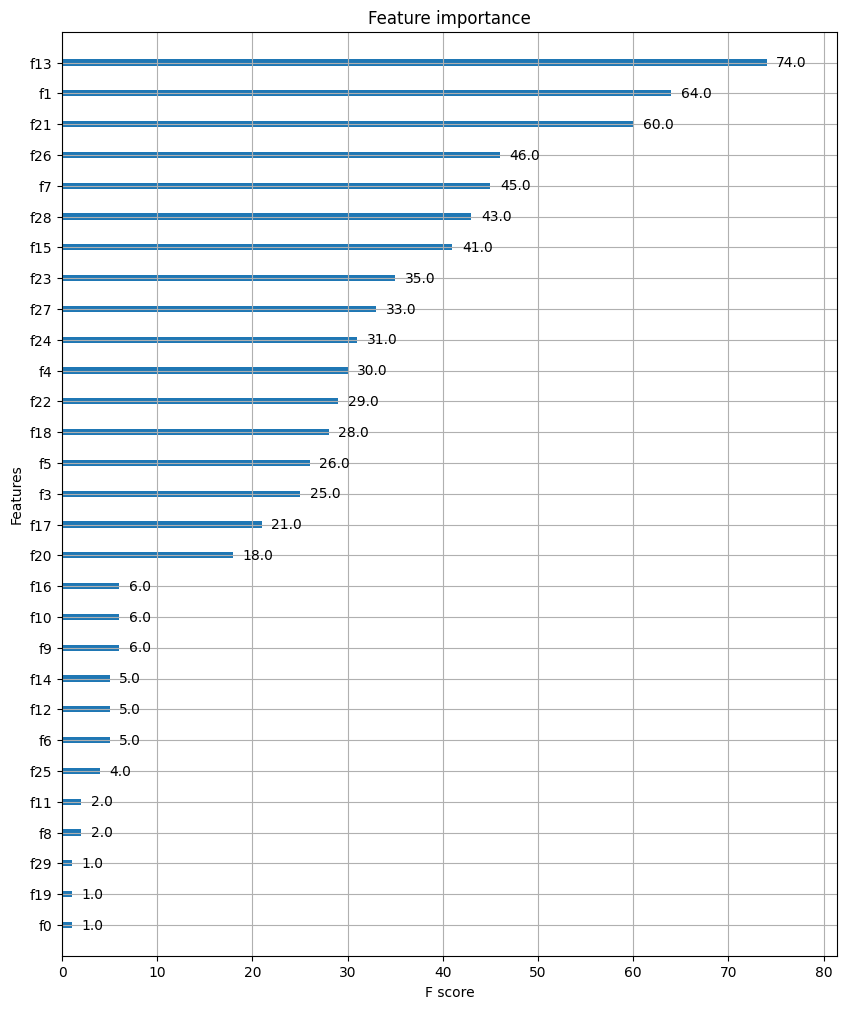

In [12]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax)

* 결정 트리에서 보여준 트리 기반 규칙 구조도 xgboost에서 to_graphviz() API 이용해 시각화 가능

  -> 파라미터로 학습이 완료된 모델 객체와 Graphviz가 참조할 파일명 입력
* 데이터 세트에 대한 교차 검증 수행 후 최적 파라미터를 구할 수 있는 방법을 cv() API로 제공(반환값은 DataFrame 형태)



```
xgboost.cv(params, dtrain, num_boost_round=10, nfold=3, stratified=False, folds=None, metrics=(), 
obj=None, feval=None, maximize=False, early_stopping_rounds=None, fpreproc=None, as_pandas=True, 
verbose_eval=None, show_stdv=True, seed=0, callbacks=None, shuffle=True)
```



## **4. 사이킷런 래퍼 XGBoost의 개요 및 적용** 

사이킷런의 프레임워크와 연동하기 위해 사이킷런 전용의 XGBoost 래퍼 클래스 개발

* 분류를 위한 래퍼 클래스 XGBClassifier
* 회귀를 위한 래퍼 클래스 XGBRegressor



(1)  XGBClassifier 이용

In [13]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870,  F1: 0.9806, AUC:0.9951


(2) get_clf_eval() 이용해 모델 예측 성능 평가

In [14]:
get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870,  F1: 0.9806, AUC:0.9951


* 조기 중단 수행 가능 - 조기 중단 관련 파라미터를 fit()에 입력

  * early_stopping_rounds : 평가 지표가 향상될 수 있는 반복 횟수
  * eval_metric : 조기 중단을 위한 평가 지표
  * eval_set : 성능 평가 수행할 데이터 세트(학습 데이터가 아닌 별도의 데이터 세트)

In [15]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals=[(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)
ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15472
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos

-> 311번 반복후 학습 완료됨

-> 211번 반복 시 logloss 0.085593, 311번 반복 시 logloss 0.085948. early_stopping_round로 지정된 100번 반복 동안 성능 평가 지수가 향상되지 않았음

In [16]:
get_clf_eval(y_test, ws100_preds, ws100_pred_proba)

오차 행렬
[[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.9870,  F1: 0.9744, AUC:0.9954


* 조기 중단값을 너무 급격하게 줄이면 아직 성능이 향상될 여지가 있음에도 불구하고 반복 멈춰버려 예측 성능 저하될 우려가 있음

In [17]:
 # early_stopping_rounds를 10으로 설정하고 재 학습.
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=evals, verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]
get_clf_eval(y_test, ws10_preds, ws10_pred_proba)

[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15472
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos

->  62번 반복 logloss 0.090311, 52번 반복 logloss 0.089577

->  10번의 반복 동안 성능 평가 지수 향상되지 못해 반복 수행하지 않고 학습 종료

->  정확도 약 0.9561. early_stopping_rounds=100일 떄의 약 0.9649보다 낮음

 (3) plot_importance() 시각화

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

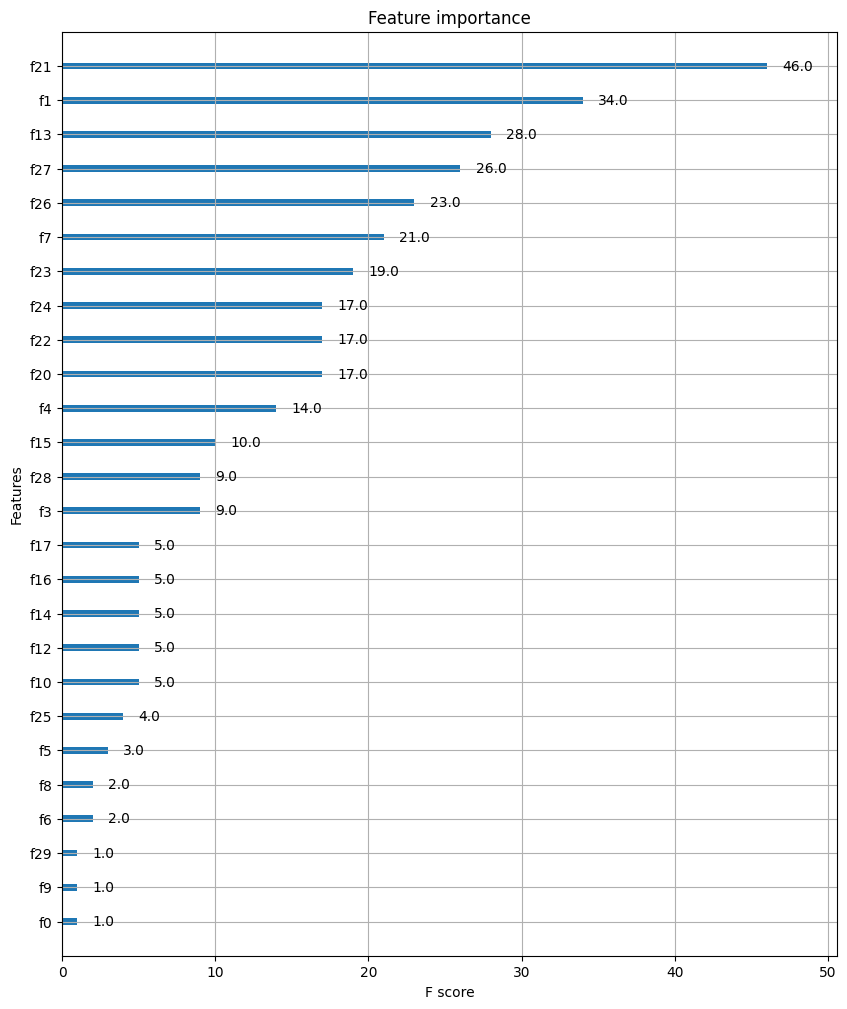

In [18]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
# 사이킷런 Wrapper 클래스를 입력해도 무방.
plot_importance(xgb_wrapper, ax=ax)

## 7. LightGBM

 XGBoost와 함께 부스팅 계열 알고리즘에서 가장 주목받고 있음

<LightGBM 장점>

* 더 빠른 학습과 예측 수행 시간.

* 더 작은 메모리 사용량

* 카테고리형 피처의 자동 변환과 최적 분할

* 대용량 데이터에 대한 뛰어난 예측 성능 및 병렬 컴퓨팅 기능 제공 + GPU까지 지원

<LightGBM 단점>

* 적은 데이터 세트에 적용할 경우 과적합 발생 쉬워(일반적으로 10000건 이하의 데이터 세트 정도)


<LightGBM 특징>
* 일반 GBM 계열의 트리 분할 방법과 다르게, 리프 중심 트리 분할(Leaf Wise) 방식 사용
  
  -> 트리의 균형을 맞추지 않고, 최대 손실 값(max delta loss)을 가지는 리프 노드를 지속적으로 분할하면서 트리의 깊이가 깊어지고 비대칭적인 규칙 트리가 생성됨
  
   -> 하지만 이렇게 최대 손실값을 가지는 리프 노드를 지속적으로 분할해 생성된 규칙 트리는 학습을 반복할수록 결국은 균형 트리 분할 방식보다 예측 오류 손실을 최소화 할 수 있다는 것이 LightGBM의 구현 사상

### **1) LightGBM 하이퍼 파라미터**

* num_iterations[default=100]

  -> 반복 수행하려는 트리의 개수 지정, 크게 지정할수록 예측 성능 높아질 수 있으나 너무 크게 지정하면 오히려 과적합으로 성능 저하될 수 있음
  
  -> 사이킷런 GBM과 XGBoost의 사이킷런 호환 클래스의 n_estimators와 같은 파라미터이므로 LightGBM의 사이킷런 호환 클래스에서는 n_estimators로 이름 변경됨

* learning_rate[default=0.1]

  -> 0에서 1 사이의 값을 지정하며 부스팅 스텝을 반복적으로 수행할 때 업데이트되는 학습률 값, 일반적으로 n_estimators를 크게 하고 learning_rate를 작게 해서 예측 성능을 향상시킬 수 있으나, 마찬가지로 과적합 이슈와 학습 시간이 길어지는 부정적인 영향도 고려해야 함
  
  -> GBM, XGBoost의 learning_rate와 같은 파라미터

* max_depth[default=-1]

  -> 트리 기반 알고리즘의 max_depth와 같음, 0보다 작은 값을 지정하면 깊이에 제한이 없음
  
  -> 지금까지 소개한 Depth wise 방식의 트리와 다르게 LightGBM은 Leaf wise 기반이므로 깊이가 상대적으로 더 깊음

* min_data_in_leaf[default=20]: 

  -> 결정 트리의 min_samples_leaf와 같은 파라미터, 하지만 사이킷런 래퍼 LightGBM 클래스인 LightGBMClassifier에서는 min_child_samples 파라미터로 이름 변경됨
  
  -> 최종 결정 클래스인 리프 노드가 되기 위해서 최소한으로 필요한 레코드 수이며, 과적합을 제어하기 위한 파라미터임

* num_leaves[default=31]

  -> 하나의 트리가 가질 수 있는 최대 리프 개수

* boosting[default=gbdt]

  -> 부스팅의 트리를 생성하는 알고리즘을 기술

* bagging_fraction[default=1.0]

  -> 트리가 커져서 과적하보디는 것을 제어하기 위해서 데이터를 샘플링하는 비율을 지정,
  
  -> 사이킷런의 GBM과 XGBVlassifier의 subsample 파라미터와 동일하기에 사이킷런 래퍼 LightGBM인 LightGBMClassifier에서는 subsample로 동일하게 파라미터 이름이 변경됨

* feature_fraction[default=1.0]

 -> 개별 트리를 학습할 때마다 무작위로 선택하는 피처의 비율, 과적합을 막기 위해 사용됨
 
 ->  GBM의 max_features와 유사하며, XGBClassifier의 colsample_bytree와 똑같으므로 LightGBMClassifier에서는 동일하게 colsample_bytree로 변경됨

* lambda_l2[default=0.0]

 -> L2 regulation 제어를 위한 값, 피처 개수가 많을 경우 적용을 검토하며 값이 클수록 과적합 감소 효과가 있음
 
 -> XGBClassifier의 reg_lambda와 동일하므로 LightGBMClassifier에서는 reg_lambda로 변경됨

* lambda_l1[default=0.0]

 ->  L1 regulation 제어를 위한 값, L2와 마찬가지로 과적합 제어를 위한 것이며, XGBClassifier의 reg_alpha와 동일하므로 LightGBMClassifier에서는 reg_alpha로 변경됨


<하이퍼 파라미터 튜닝 방안>

* num_leaves의 개수를 중심으로 min_child_samples(min_data_in_leaf), max_depth 함께 조정하면서 모델의 복잡도 줄이는 것

* learning_rate 작게 하면서 n_estimators 크게 하는 것

* 과적합 제어 위해 reg_lambda, reg_alpha와 같은 regularization 적용



## **2) LigthGBM 적용 - 위스콘신 유방암 예측**

In [19]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
ftr = dataset.data
target = dataset.target

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test , y_train, y_test = train_test_split(ftr, target, test_size=0.2, random_state=156)

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정.
lgbm_wrapper = LGBMClassifier(n_estimators=400)

# LigthGBM도 XGBoost와 동일하게 조기 중단 수행 가능.
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]

[1]	valid_0's binary_logloss: 0.565079
[2]	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355773
[7]	valid_0's binary_logloss: 0.329587
[8]	valid_0's binary_logloss: 0.308478
[9]	valid_0's binary_logloss: 0.285395
[10]	valid_0's binary_logloss: 0.267055
[11]	valid_0's binary_logloss: 0.252013
[12]	valid_0's binary_logloss: 0.237018
[13]	valid_0's binary_logloss: 0.224756
[14]	valid_0's binary_logloss: 0.213383
[15]	valid_0's binary_logloss: 0.203058
[16]	valid_0's binary_logloss: 0.194015
[17]	valid_0's binary_logloss: 0.186412
[18]	valid_0's binary_logloss: 0.179108
[19]	valid_0's binary_logloss: 0.174004
[20]	valid_0's binary_logloss: 0.167155
[21]	valid_0's binary_logloss: 0.162494
[22]	valid_0's binary_logloss: 0.156886
[23]	valid_0's binary_logloss: 0.152855
[24]	valid_0's binary_logloss: 0.151113
[25]	valid_0's binary_logloss: 0.148395
[26]	vali

In [20]:
get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[33  4]
 [ 1 76]]
정확도: 0.9561, 정밀도: 0.9500, 재현율: 0.9870,  F1: 0.9682, AUC:0.9905


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

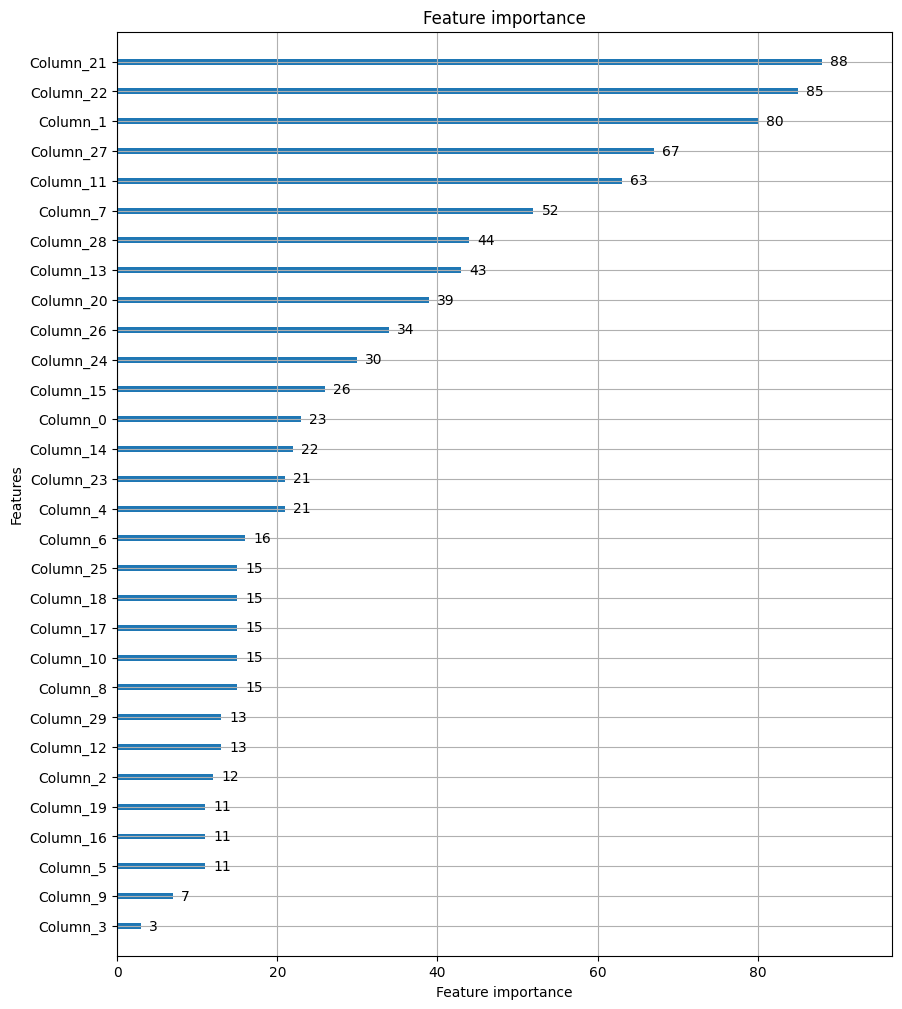

In [21]:
# plot_importance()를 이용해 피처 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)

## **10. 스태킹 앙상블**

**스태킹(Stacking)**

- 개별적인 여러 알고리즘으로 예측한 데이터를 기반으로 다시 예측 수행

-  개별 알고리즘의 예측 결과 데이터 세트를 최종적인 메타 데이터 세트로 만들어 별도의 ML 알고리즘으로 최종 학습을 수행하고 테스트 데이터를 기반으로 다시 최종 예측 수행하는 방식(메타 모델)


<스태킹(Stacking) 특징>
* 개별적인 기반 모델 + 최종 메타 모델 필요

* 여러 개별 모델의 예측 데이터를 각각 스태킹 형태로 결합해 최종 메타 모델의 학습용 피처 데이터 세트와 테스트용 피처 데이터 세트 만드는 것

* 많은 개별 모델 필요. 일반적으로 성능이 비슷한 모델을 결합해 좀 더 나은 성능 향상 도출하기 위해 적용

* 여러 개의 모델에 대한 예측값을 합한 후, 즉 스태킹 형태로 쌓은 뒤 이에 대한 예측을 다시 수행하는 것

(1) 데이터 분할

In [22]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer_data = load_breast_cancer()

X_data = cancer_data.data
y_label = cancer_data.target

X_train, X_test, y_train, y_test = train_test_split(X_data, y_label, test_size=0.2, random_state=0)

(2) 스태킹에 사용될 머신러닝 알고리즘 클래스 생성

In [23]:
# 개별 ML 모델 생성
knn_clf = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

# 스태킹으로 만들어진 데이터 세트를 학습, 예측할 최종 모델
lr_final = LogisticRegression(C=10)

(2) 개별 모델 학습

In [24]:
# 개별 모델들을 학습.
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

(3) 예측 정확도 구하기

In [25]:
# 학습된 개별 모델들이 각자 반환하는 예측 데이터 세트를 생성하고 개별 모델의 정확도 측정.
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)

print('KNN 정확도: {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('결정 트리 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('에이다부스트 정확도: {0:.4f}'.format(accuracy_score(y_test, ada_pred)))

KNN 정확도: 0.9211
랜덤 포레스트 정확도: 0.9649
결정 트리 정확도: 0.9035
에이다부스트 정확도: 0.9561


(4) 최종 메타 모델

- 개별 알고리즘으로부터 예측된 예측값을 칼럼 레벨로 옆으로 붙여서 피처 값을 만들어, 최종 메타 모델인 로지스틱 회귀에서 학습 데이터로 다시 사용

In [26]:
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print(pred.shape)

# transpose를 이용해 행과 열의 위치 교환. 칼럼 레벨로 각 알고리즘의 예측 결과를 피처로 만듦.
pred = np.transpose(pred)
print(pred.shape)

(4, 114)
(114, 4)


(5) 최종 메타 모델 학습, 예측 정확도

In [27]:
lr_final.fit(pred, y_test)
final = lr_final.predict(pred)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, final)))

최종 메타 모델의 예측 정확도: 0.9737


-> 정확도 향상

### **1) CV 세트 기반의 스태킹**

과적합을 개선하기 위해 최종 메타 모델을 위한 데이터 세트를 만들 때 교차 검증 기반으로 예측된 결과 데이터 세트 이용

* 스텝 1 

  * 각 모델별로 원본 학습/테스트 데이터를 예측한 결과 값을 기반으로 메타 모델을 위한 학습용/테스트용 데이터 생성

* 스텝 2 
  *  스텝 1에서 개별 모델들이 생성한 학습용/테스트용 데이터를 모두 스태킹 형태로 합쳐서 메타 모델이 학습/예측할 최종 학습용/테스트 데이터 세트 생성 
  * 최종적으로 생성된 학습 데이터 세트와 원본 학습 데이터의 레이블 데이터 기반으로 학습 
  * 최종적으로 생성된 테스트 데이터 세트 예측 
  * 원본 테스트 데이터의 레이블 데이터 기반으로 평가

* 스텝1의 첫 번째 반복(이를 3번(폴드개수) 반복)

(1) 스텝 1 : 개별 모델이 메타 모델을 위한 학습용 데이터와 테스트 데이터 생성

In [28]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수.
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
  # 지정된 n_folds 값으로 KFold 생성.
  kf = KFold(n_splits=n_folds, shuffle=False)
  # 추후에 메타 모델이 학습할 학습 데이터 반환을 위한 넘파이 배열 초기화
  train_fold_pred = np.zeros((X_train_n.shape[0],1))
  test_pred = np.zeros((X_test_n.shape[0],n_folds))
  print(model.__class__.__name__,' model 시작 ')

  for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
    # 입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 세트 추출
    print('\t 폴드 세트: ', folder_counter, ' 시작 ')
    X_tr = X_train_n[train_index]
    y_tr = y_train_n[train_index]
    X_te = X_train_n[valid_index]

    # 폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
    model.fit(X_tr, y_tr)
    # 폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
    train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
    # 입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장.
    test_pred[:, folder_counter] = model.predict(X_test_n)

  # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성
  test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)

  # train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
  return train_fold_pred, test_pred_mean

* 각 모델별로 get_stacking_base_datasets()함수 호출해 각각 메타 모델이 사용할 학습용, 테스트용 데이터 세트 반환

In [29]:
knn_train, knn_test = get_stacking_base_datasets(knn_clf, X_train, y_train, X_test, 7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf, X_train, y_train, X_test, 7)
dt_train, dt_test = get_stacking_base_datasets(dt_clf, X_train, y_train, X_test, 7)
ada_train, ada_test = get_stacking_base_datasets(ada_clf, X_train, y_train, X_test, 7)

KNeighborsClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
RandomForestClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
DecisionTreeClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
AdaBoostClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 


(2) 스텝 2 : 각 모델별 학습 데이터와 테스트 데이터 합치기(넘파이의 concatenate())

In [30]:
Stack_final_X_train = np.concatenate((knn_train, rf_train, dt_train, ada_train), axis=1)
Stack_final_X_test = np.concatenate((knn_test, rf_test, dt_test, ada_test), axis=1)
print('원본 학습 피처 데이터 Shape:',X_train.shape, '원본 테스트 피처 Shape:',X_test.shape)
print('스태킹 학습 피처 데이터 Shape:',Stack_final_X_train.shape,
      '스태킹 테스트 피어 데이터 Shape:',Stack_final_X_test.shape)

원본 학습 피처 데이터 Shape: (455, 30) 원본 테스트 피처 Shape: (114, 30)
스태킹 학습 피처 데이터 Shape: (455, 4) 스태킹 테스트 피어 데이터 Shape: (114, 4)


 -> Stack_final_X_train : 메타 모델이 학습할 학습용 피처 데이터 세트
 
 -> Stack_final_X_test : 메타 모델이 예측할 테스트용 피어 데이터 세트

(3) 정확도 측정

* 최종 메타 모델인 로지스틱 회귀를 스태킹된 학습용 피처 데이터 세트와 원본 학습 레이블 데이터로 학습 
 
* 스태킹된 테스트 데이터 세트로 예측 

* 예측 결과를 원본 테스트 레이블 데이터와 비교해 정확도 측정

In [31]:
lr_final.fit(Stack_final_X_train, y_train)
stack_final = lr_final.predict(Stack_final_X_test)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, stack_final)))

최종 메타 모델의 예측 정확도: 0.9737


## **11. 정리**

(1) 앙상블 

결정 트리 기반의 다수의 약한 학습기를 결합해 변동성을 줄여 예측 오류 줄이고 성능 개선

(2) 배깅 
학습 데이터를 중복 허용하면서 다수의 세트로 샘플링하여 이를 다수의 약한 학습기가 학습한 뒤 최종 결과 결합해 예측

* 랜덤 포레스트 

(3) 부스팅 
학습기들이 순차적으로 학습 진행하면서 예측 틀린 데이터에 대해서는 가중치 부여해 다음번 학습기가 학습할 때 이전에 예측이 틀린 데이터에 대해서는 보다 높은 정확도로 예측할 수 있도록

* GBM(Gradient Boosting Machine) 
* XGBoost와 LightGBM 

(4) 스태킹 

 여러 개의 개별 모델들이 생성한 예측 데이터를 기반으로 최종 메타 모델이 학습할 별도의 학습 데이터 세트와 예측할 테스트 데이터 세트 재생성(스태킹 형태로 결합)